In [1]:
from modules import *

In [2]:
cur = LoginWSIViewer()
wsiluadinfo = GetWSIInfos(cur, "wsiluadinfo")

In [3]:
import openslide

pathWSI = wsiluadinfo["TCGA-38-A44F-01Z-00-DX1"]["filepath"]
handleWSI = openslide.OpenSlide(pathWSI)
coordinates = wsiluadinfo["TCGA-38-A44F-01Z-00-DX1"]["corrdihuman"]["coordinates"]

In [4]:
rangeSelectList = [{'h' : (128, 250), 's' : (20, 250), 'v' : (60, 240), 'l' : (20, 255)}]
gauthSelect = {"gX" : 31,"gS" : 21, "th" : 0.2}

In [6]:
import numpy as np

img = np.array(handleWSI.read_region((0, 0), 2, handleWSI.level_dimensions[2]).convert("RGB"))
hsvlDic = CvtHSVLDic(img)

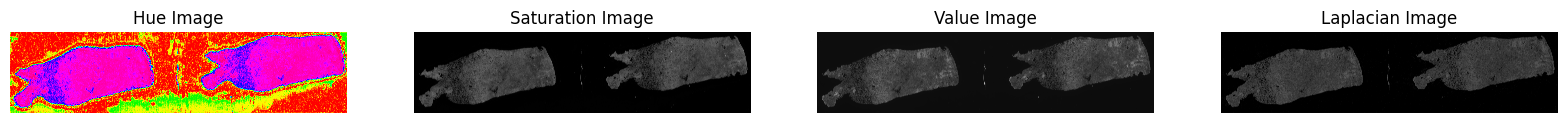

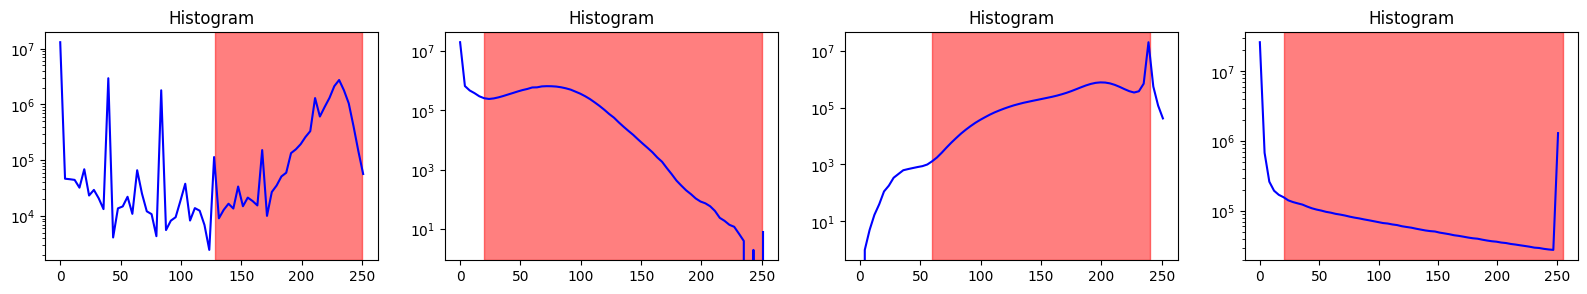

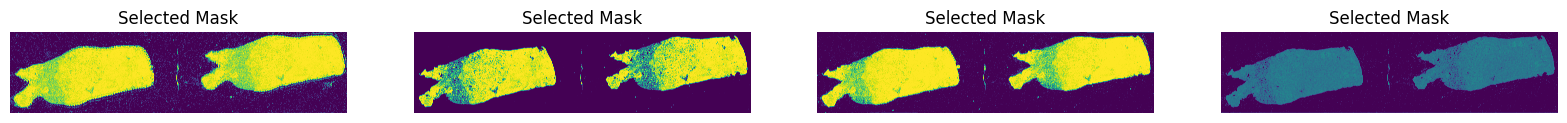

In [6]:
ShowSelectHistogram(hsvlDic, rangeSelectList[0])

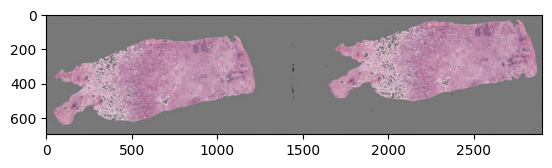

In [7]:
maskSpec = RegionMasking(img, rangeSelectList, gauthSelect)
ShowOverlapMask(img, maskSpec, 1/4, pathSave="test_spec.png")

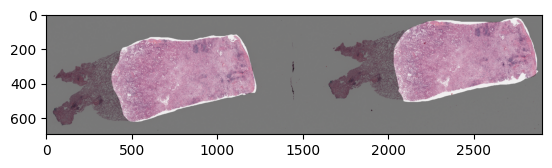

In [8]:
maskAnno = CorrdinateMasking(img.shape[:2], handleWSI.level_downsamples[2], coordinates)
ShowOverlapMask(img, maskAnno, 1/4, pathSave="test_anno.png")

In [9]:
SaveMaskBigtiff("test_spec.tif", maskSpec)
SaveMaskBigtiff("test_anno.tif", maskAnno)

In [10]:
patchImporter = WSIPatchImporter(pathWSI, "test_spec.tif", "test_anno.tif")

In [11]:
sizeMicronXY = np.array([1000, 1000])
intervalMicronXY = np.array([500, 500])
resizePixelXY = np.array([128, 128])

coordinatesPatch = patchImporter.MakePatchCoordinates(sizeMicronXY, intervalMicronXY, resizePixelXY)

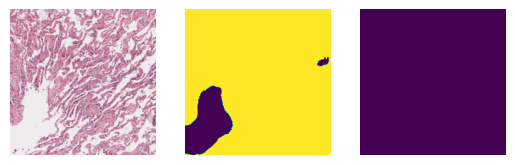

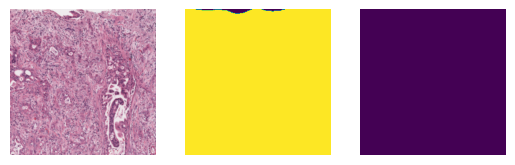

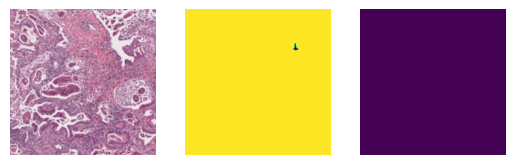

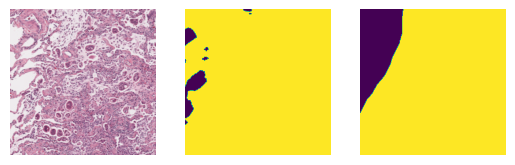

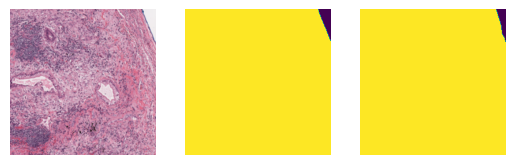

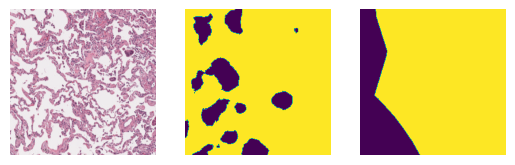

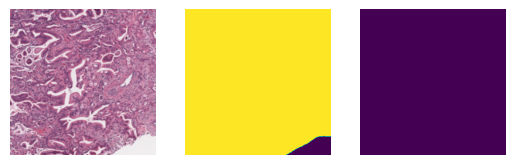

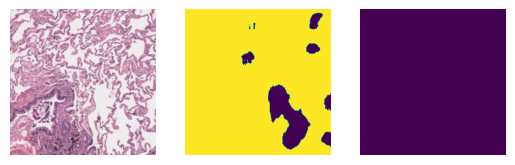

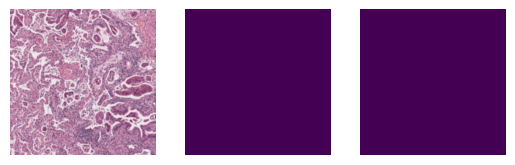

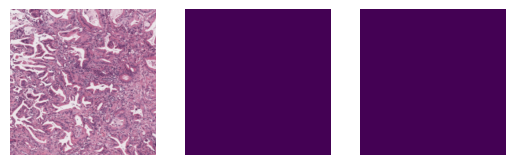

In [18]:
import matplotlib.pyplot as plt

patchIsUseful = patchImporter.IsUsfulMask("spec", coordinatesPatch, ratioPass=0.7)

for coordinate in coordinatesPatch[patchIsUseful][:10]:
    plt.subplot(1,3,1)
    plt.imshow(patchImporter.LoadImage(coordinate))
    plt.axis("off")
    plt.subplot(1,3,2)
    plt.imshow(patchImporter.LoadMask("spec", coordinate))
    plt.axis("off")
    plt.subplot(1,3,3)
    plt.imshow(patchImporter.LoadMask("anno", coordinate))
    plt.axis("off")
    plt.show()

# Whole Slide Image (WSI) Preprocessing Module
   

Extract Data From Mysql Database
===========
To easily load data from database, Make database load module by using pymysql package.   
It also return organized WSI informations as python dictionary.   
   
Make Region Mask Array And Export
===========
Calculate color ranged region at Hue, Saturation, Value, Laplacian chennels.   
Make intersection region for each chennel, Also it can consider multiple color range set.   
Final mask array is union of mask arrays which calculated own color range set.   
   
[To Do 1]   
   
For easy to see color range selecter's performance,   
There are show image and plot color histogram function in preview.py   
   
WSI Patch Image Importer
===========
WSI data have much of properties and parameters. Also their image load modules required slide level 0's coordinates.   
Each WSIs sometimes have different micron per pixels (mpp), It needs resizing process to fit same absolute size.   
For these reasion not to easy to see and use slide image's data.   
   
WSI importer class have micron to pixel converter.   
Input datas are must have micron values and resizing pixel value.   
Process find apt import slide level to optimizing extract process.   
   
[To Do 2]   
   
After that, Set default pixel size of WSI and each mask,   
For when user can get patch image and mask even just input coordinates value.   
   
Importer class also can determine some patch image is usable or not by referencing same located mask.   
   
[To Do 3]   
   
To Do
===========
1. Draw algorithm and image of image masking preprocessing.
2. Write apt import slide level finder formula.
3. Make reference image of load process.
   
Also prepare and upload reference WSI image link and annotation coordinates.